In [4]:
import wandb

wandb_api = '7dcd5187be3f8ff229709dd8513e7a13624e5405'
wandb.login(key=wandb_api)

wandb: Currently logged in as: lesythang1581994 (lesythang). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\ADMIN\.netrc


True

In [5]:
import pandas as pd

In [17]:
#Khởi tạo dataset

areas = [6.7 , 4.6 , 3.5 , 5.5]
prices = [9.1 , 5.9 , 4.6 , 6.7]

dataset = pd. DataFrame ({
                            'areas': areas ,
                            'prices': prices
                        })
dataset.head()

,areas,prices
0,6.7,9.1
1,4.6,5.9
2,3.5,4.6
3,5.5,6.7


In [7]:
def predict(x,w,b):
    return x*w+b

In [8]:
#Tính đạo hàm
def gradient (y_hat , y, x):
    dw = 2*x*( y_hat -y)
    db = 2*( y_hat -y)

    return (dw , db)

In [9]:
#Update giá trị trọng số

def update_weight (w, b, lr , dw , db):
    w_new = w - lr*dw
    b_new = b - lr*db

    return (w_new , b_new )

In [37]:
# init weights
b = 0.04
w = -0.34
lr = 0.01
epochs = 10

# init project wandb
wandb . init (
# Set the project where this run will be logged
project ="demo - linear - regression ",
config ={
" learning_rate ": lr ,
" epochs ": epochs ,
},)

wandb .run .log ({" Dataset " : wandb . Table ( dataframe = dataset )})

X_train = dataset ['areas']
Y_train = dataset ['prices']

N = len ( X_train )
# parameter
losses = [] # for debug

for epoch in range ( epochs ):
    # for an epoch
    for i in range (N):
        # get a sample
        x = X_train [i]
        y = Y_train [i]

        # predict y_hat
        y_hat = predict (x, w, b)

        # compute loss
        loss = (y_hat -y)*( y_hat -y) / 2.0

        # tracking loss with WandB
        wandb .log ({" loss ": loss })

        # compute gradient
        (dw , db) = gradient (y_hat , y, x)

        # update weights
        (w, b) = update_weight (w, b, lr , dw , db)
    losses.append(1/loss)
    # Mark a run as finished , and finish uploading all data .
wandb . finish ()

loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,0.13448


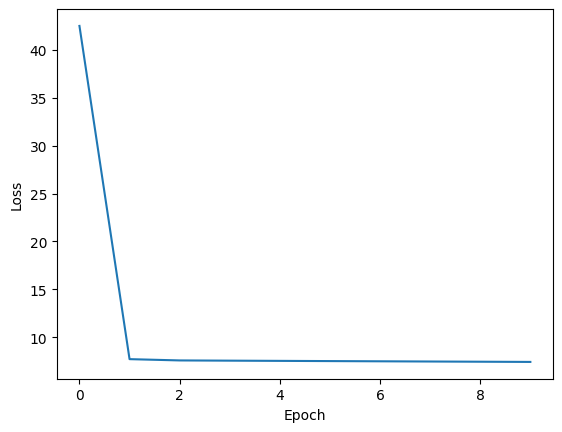

In [38]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
     